In [62]:
#About the Student Performance Dataset
The Student Performance Dataset is a structured collection of data designed to analyze and predict academic outcomes among students based on a variety of demographic, behavioral, and socio-academic variables. 
The dataset consists of multiple features that provide insights into students backgrounds, study habits, and participation in school related activities.
Each record in the dataset represents an individual student and includes the following attributes:
Demographic Information
Age, Gender, Ethnicity: used to examine trends across different student groups.
Parental & Academic Background
Parental Education, Parental Support, Tutoring: indicators of home and external academic support.
Behavioral Attributes
StudyTimeWeekly, Absences: reflect students dedication and attendance patterns.
Extracurricular Involvement
Sports, Music, Volunteering, Eacuxtrrricular: gauge student engagement outside of academics.
#Target Variables
GradeClass: categorical variable (e.g., Low, Medium, High) for classification tasks.

SyntaxError: invalid syntax (320439378.py, line 2)

In [60]:
🎯 Problem Statement:
# Objective:
To develop a machine learning model that predicts a student’s academic performance (measured by GPA or Grade Class) based on demographic, behavioral, and support-related factors.
# Dataset Description:
The dataset consists of student-level records, with each entry containing:
Demographic attributes such as Age, Gender, and Ethnicity
Family and academic background like Parental Education, Tutoring, and Parental Support
Behavioral and activity-based features such as Study Time per Week, Absences, Sports, Music, Volunteering, and Extracurricular involvement
# Target Variable:
GradeClass (e.g., High, Medium, Low) — for classification models
# Goal:
To analyze how various factors influence student performance and predict the GPA or GradeClass of new students, helping schools:
Identify at-risk students early
Optimize support and tutoring efforts
Tailor extracurricular programs for academic improvement
This dataset enables researchers and educators to build predictive models to better understand the factors affecting student performance and develop interventions aimed at improving educational outcomes.

SyntaxError: invalid character '🎯' (U+1F3AF) (1087875208.py, line 1)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('Student performance.csv') 
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [22]:
df.shape

(2392, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [15]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [26]:
print(df ['GradeClass'].value_counts())

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


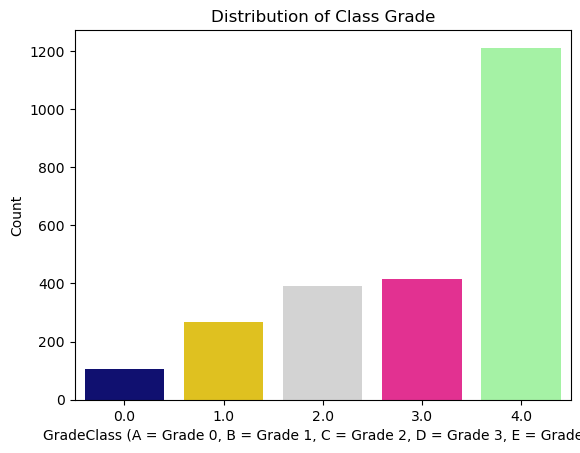

In [28]:
df.columns = df.columns.str.strip()
custom_palette = ['#000080', '#FFD700', '#D3D3D3', '#FF1493', '#98FF98']
sns.countplot(x='GradeClass', hue='GradeClass', data=df, palette=custom_palette, legend=False)
plt.title('Distribution of Class Grade')
plt.xlabel('GradeClass (A = Grade 0, B = Grade 1, C = Grade 2, D = Grade 3, E = Grade 4)')
plt.ylabel('Count')
plt.show()



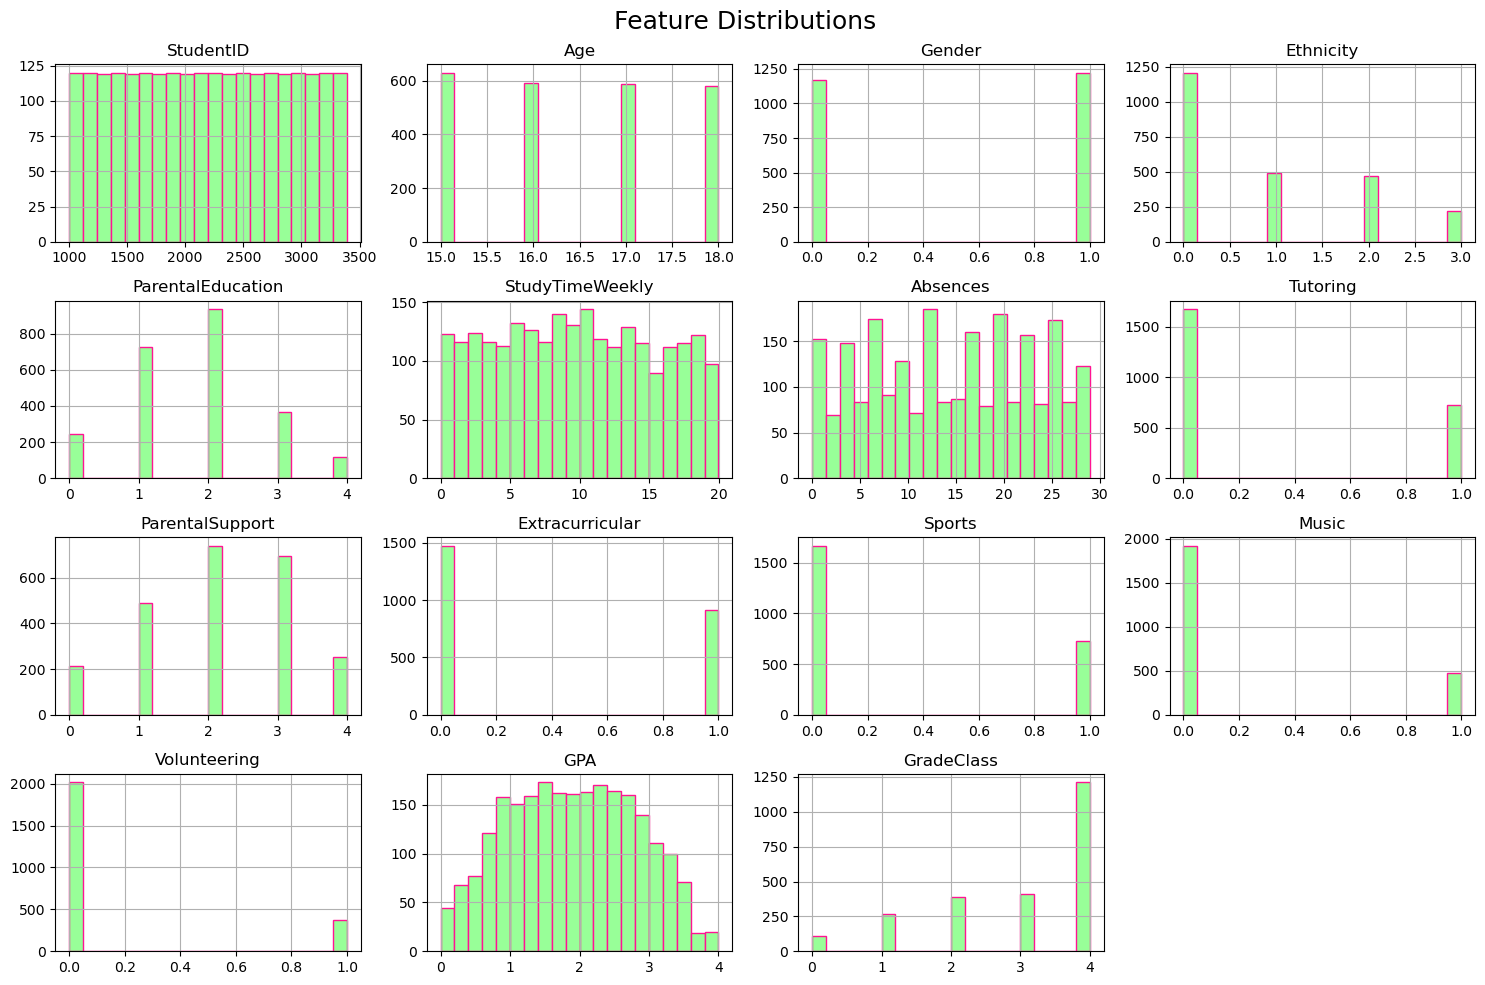

In [35]:
df.hist(figsize=(15, 10), bins=20, color= '#98FF98', edgecolor='#FF1493')
plt.suptitle('Feature Distributions', fontsize=18)
plt.tight_layout()
plt.show()

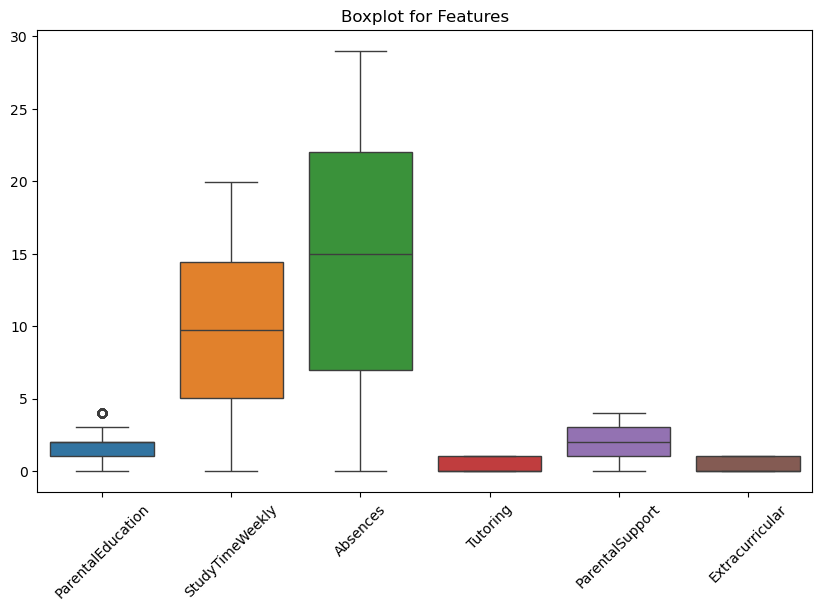

In [32]:
features_to_plot = ['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport','Extracurricular']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features_to_plot])
plt.title('Boxplot for Features')
plt.xticks(rotation=45)
plt.show()

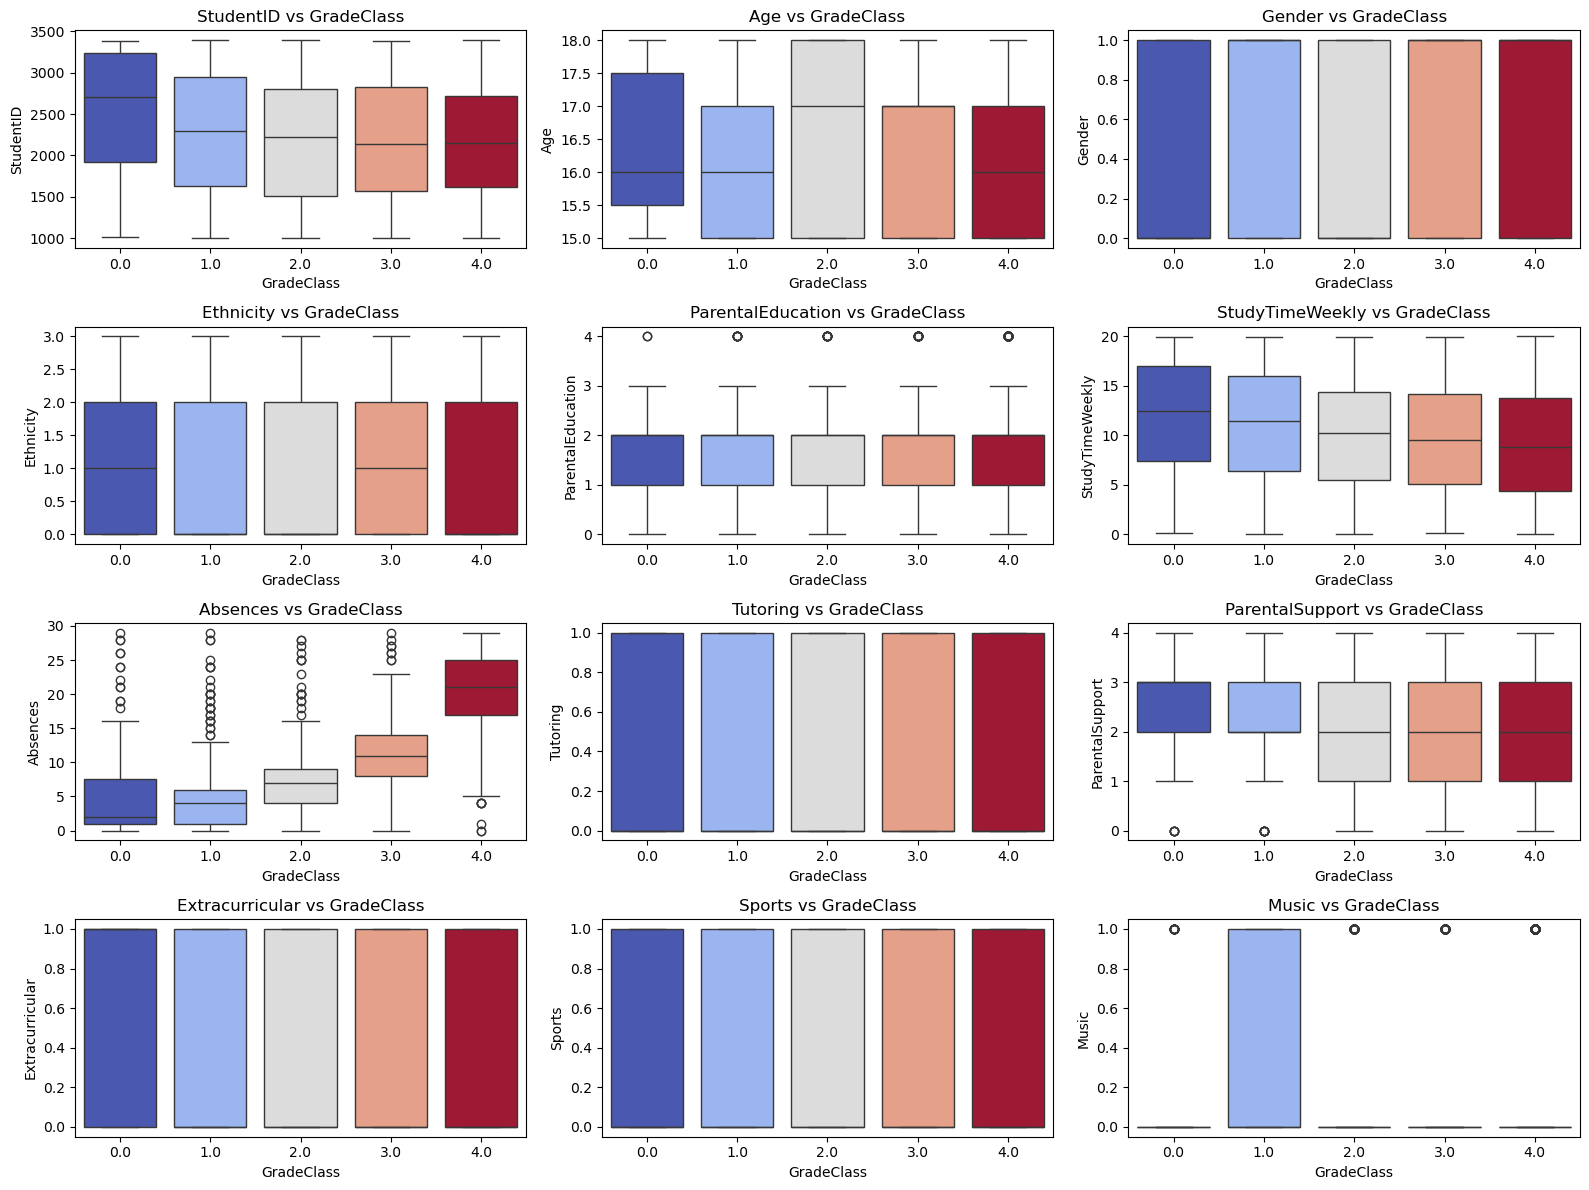

In [34]:
df.columns = df.columns.str.strip()
numeric_cols = df.select_dtypes(include='number').columns
columns_to_plot = [col for col in numeric_cols if col != 'GradeClass']
rows, cols = 4, 3
max_plots = rows * cols
columns_to_plot = columns_to_plot[:max_plots]
plt.figure(figsize=(16, 12))
for idx, col in enumerate(columns_to_plot, 1):
    plt.subplot(rows, cols, idx)
    sns.boxplot(x='GradeClass', y=col, data=df, hue='GradeClass', palette='coolwarm', legend=False)
    plt.title(f'{col} vs GradeClass')
    plt.tight_layout()

plt.show()

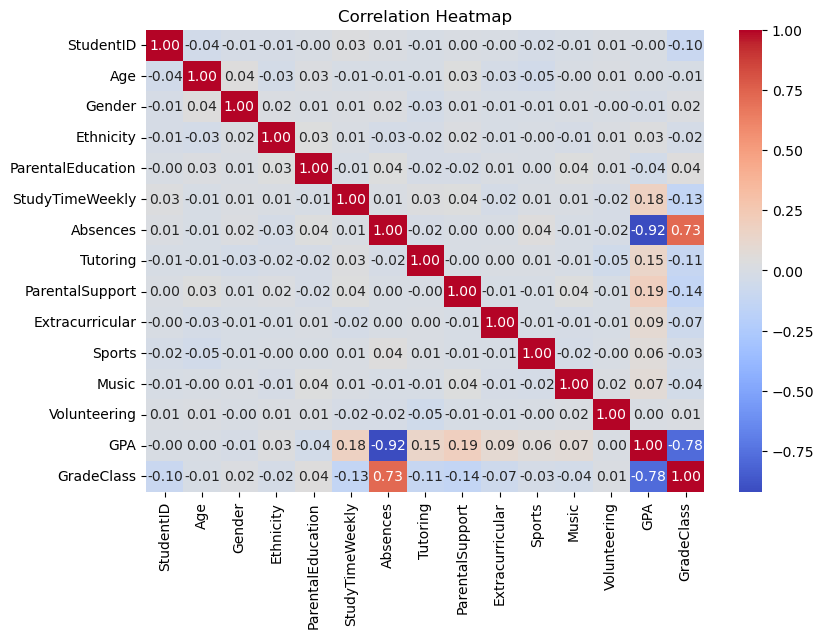

In [47]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
invalid_cols = ['ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','GPA'] 
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)
df.isnull().sum()

StudentID               0
Age                     0
Gender                  0
Ethnicity               0
ParentalEducation     243
StudyTimeWeekly         0
Absences               67
Tutoring             1671
ParentalSupport       212
Extracurricular      1475
Sports                  0
Music                   0
Volunteering            0
GPA                    16
GradeClass              0
dtype: int64

In [57]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2.0,19.833723,7.0,1.0,2.0,NaN,0,1,0,2.929196,2.0
1,1002,18,0,0,1.0,15.408756,NaN,NaN,1.0,NaN,0,0,0,3.042915,1.0
2,1003,15,0,2,3.0,4.210570,26.0,NaN,2.0,NaN,0,0,0,0.112602,4.0
3,1004,17,1,0,3.0,10.028829,14.0,NaN,3.0,1.0,0,0,0,2.054218,3.0
4,1005,17,1,0,2.0,4.672495,17.0,1.0,3.0,NaN,0,0,0,1.288061,4.0


In [65]:
df.fillna(df.median(), inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler

X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
sfs_forward = SequentialFeatureSelector(logreg, n_features_to_select=6, direction='forward')
sfs_forward.fit(X_scaled, y)

selected_forward = X.columns[sfs_forward.get_support()]
print("Selected Features (Forward Selection):", list(selected_forward))

Selected Features (Forward Selection): ['Age', 'Ethnicity', 'ParentalEducation', 'Extracurricular', 'Volunteering', 'GPA']


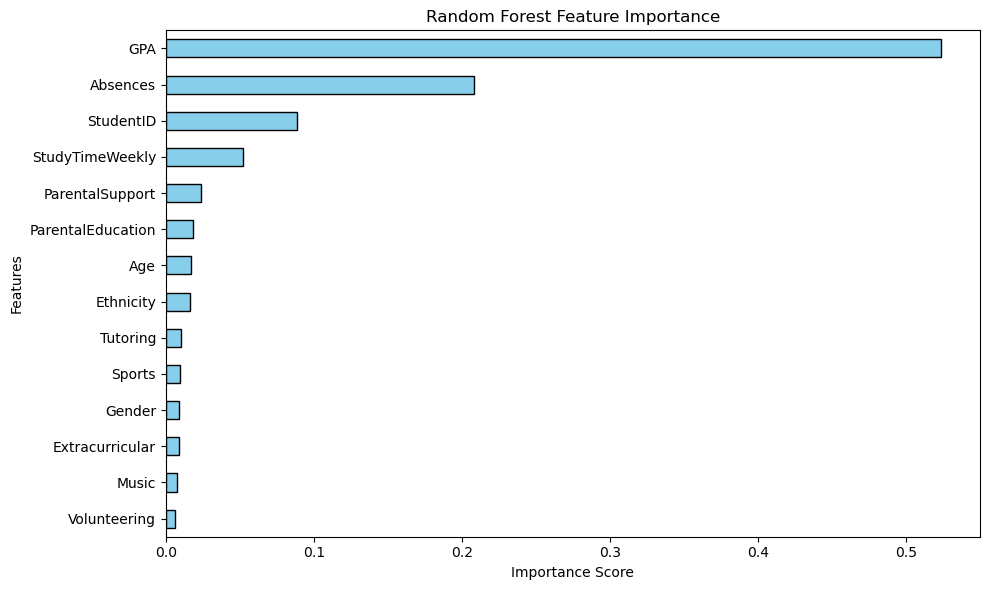

Top Features by Random Forest:
GPA                  0.523978
Absences             0.208076
StudentID            0.088722
StudyTimeWeekly      0.052370
ParentalSupport      0.023524
ParentalEducation    0.018103
Age                  0.016831
Ethnicity            0.016440
Tutoring             0.010348
Sports               0.009506
Gender               0.009184
Extracurricular      0.008819
Music                0.007637
Volunteering         0.006460
dtype: float64


In [74]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_

features = pd.Series(importances, index=X.columns)
features.sort_values(ascending=True).plot( kind='barh',title="Random Forest Feature Importance", figsize=(10, 6), color='skyblue', edgecolor='black')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

print("Top Features by Random Forest:")
print(features.sort_values(ascending=False))


In [18]:
import pandas as pd

# Load dataset (update the path to your file)
df = pd.read_csv("Student performance.csv")


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["GradeClass"]) 
y = df["GradeClass"]                 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [35]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (1913, 14)
Testing Set Shape: (479, 14)


In [37]:
print("X_train shape:", X_train.shape) 
print("X_test shape:", X_test.shape)     
print("y_train shape:", y_train.shape)   
print("y_test shape:", y_test.shape) 

X_train shape: (1913, 14)
X_test shape: (479, 14)
y_train shape: (1913,)
y_test shape: (479,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test) 

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7515657620041754

Classification Report:
               precision    recall  f1-score   support

         0.0       0.33      0.19      0.24        21
         1.0       0.50      0.41      0.45        54
         2.0       0.56      0.69      0.62        78
         3.0       0.68      0.61      0.65        83
         4.0       0.91      0.94      0.93       243

    accuracy                           0.75       479
   macro avg       0.60      0.57      0.58       479
weighted avg       0.74      0.75      0.74       479



In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.33      0.19      0.24        21
         1.0       0.50      0.41      0.45        54
         2.0       0.56      0.69      0.62        78
         3.0       0.68      0.61      0.65        83
         4.0       0.91      0.94      0.93       243

    accuracy                           0.75       479
   macro avg       0.60      0.57      0.58       479
weighted avg       0.74      0.75      0.74       479



In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(eval_metric='mlogloss')  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9164926931106472


In [128]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = XGBClassifier(
    n_estimators=800,
    max_depth=6
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.9123173277661796

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67        22
         1.0       0.80      0.88      0.83        49
         2.0       0.90      0.86      0.88        85
         3.0       0.88      0.90      0.89        86
         4.0       0.97      0.97      0.97       237

    accuracy                           0.91       479
   macro avg       0.85      0.85      0.85       479
weighted avg       0.91      0.91      0.91       479



In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
class_labels = [0, 1, 2, 3, 4]

for i, label in enumerate(class_labels):
    TP = conf_mat[i, i]
    FP = conf_mat[:, i].sum() - TP 
    FN = conf_mat[i, :].sum() - TP
    TN = conf_mat.sum() - (TP + FP + FN)
    
    print(f"\nClass {label}:")
    print(f"  TP (True Positive): {TP}")
    print(f"  FP (False Positive): {FP}")
    print(f"  FN (False Negative): {FN}")
    print(f"  TN (True Negative): {TN}")


Class 0:
  TP (True Positive): 13
  FP (False Positive): 5
  FN (False Negative): 9
  TN (True Negative): 452

Class 1:
  TP (True Positive): 43
  FP (False Positive): 13
  FN (False Negative): 6
  TN (True Negative): 417

Class 2:
  TP (True Positive): 73
  FP (False Positive): 7
  FN (False Negative): 12
  TN (True Negative): 387

Class 3:
  TP (True Positive): 78
  FP (False Positive): 9
  FN (False Negative): 8
  TN (True Negative): 384

Class 4:
  TP (True Positive): 232
  FP (False Positive): 6
  FN (False Negative): 5
  TN (True Negative): 236


In [7]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

import pandas as pd
df = pd.read_csv("Student performance.csv")  
X = df.drop("GradeClass", axis=1)
y = df["GradeClass"]
# Load a sample dataset (replace this with your own X, y if available)
data = load_iris()
X = df.drop("GradeClass", axis=1)
y = df["GradeClass"]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best parameters
print("Best Trial:")
print(study.best_trial)

# Train final model
best_params = study.best_trial.params
best_params["use_label_encoder"] = False
best_params["eval_metric"] = "logloss"
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\nFinal Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred))

[I 2025-07-05 08:08:35,366] A new study created in memory with name: no-name-18f71015-c740-45b2-aa72-6dc1023f2400
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:08:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-07-05 08:08:37,139] Trial 0 finished with value: 0.9164926931106472 and parameters: {'n_estimators': 551, 'max_depth': 3, 'learning_rate': 0.0430827358076736, 'subsample': 0.5393407724242243, 'colsample_bytree': 0.8897040515027491, 'gamma': 4.13199756064978, 'reg_alpha': 2.698415429886028, 'reg_lambda': 3.8268902439970702}. Best is trial 0 with value: 0.9164926931106472.
C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:08:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

Best Trial:
FrozenTrial(number=0, state=1, values=[0.9164926931106472], datetime_start=datetime.datetime(2025, 7, 5, 8, 8, 35, 370974), datetime_complete=datetime.datetime(2025, 7, 5, 8, 8, 37, 139462), params={'n_estimators': 551, 'max_depth': 3, 'learning_rate': 0.0430827358076736, 'subsample': 0.5393407724242243, 'colsample_bytree': 0.8897040515027491, 'gamma': 4.13199756064978, 'reg_alpha': 2.698415429886028, 'reg_lambda': 3.8268902439970702}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'reg_alpha': FloatDistribution(high=5.0,

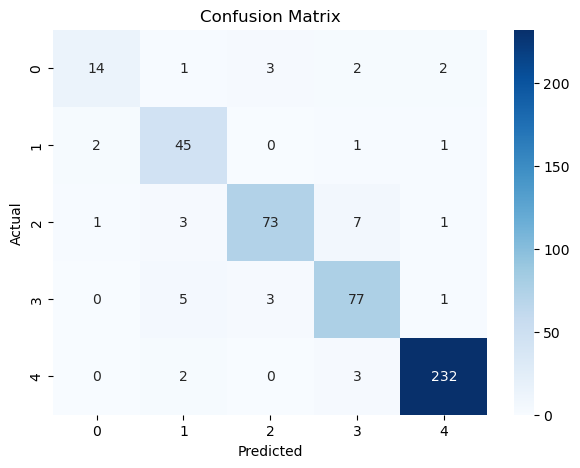

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3, 4],  # adjust these if your class labels are different
            yticklabels=[0, 1, 2, 3, 4])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


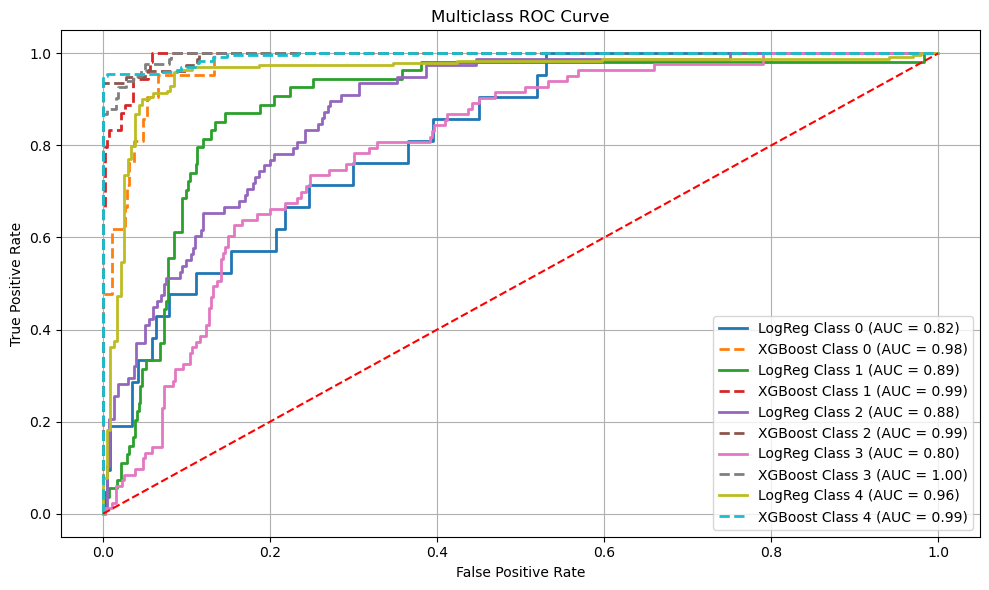

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# 🧠 Recreate and fit the logistic model (if not already done)
logistic_model = LogisticRegression(multi_class='ovr', solver='liblinear')  # use 'ovr' for predict_proba to work
logistic_model.fit(X_train, y_train)

# 🧠 Fit the XGBoost model (if not already done)
from xgboost import XGBClassifier
final_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
final_model.fit(X_train, y_train)

# ✅ Binarize true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# ✅ Get predicted probabilities for each class
log_proba_bin = logistic_model.predict_proba(X_test)
xgb_proba_bin = final_model.predict_proba(X_test)

# 🎨 Plot ROC for each class
plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr_log, tpr_log, _ = roc_curve(y_test_bin[:, i], log_proba_bin[:, i])
    auc_log = auc(fpr_log, tpr_log)

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin[:, i], xgb_proba_bin[:, i])
    auc_xgb = auc(fpr_xgb, tpr_xgb)

    plt.plot(fpr_log, tpr_log, lw=2, label=f'LogReg Class {i} (AUC = {auc_log:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, lw=2, linestyle='--', label=f'XGBoost Class {i} (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
import joblib
joblib.dump(xgb_model, "xgb_Student_performance_model.pkl")

['xgb_Student_performance_model.pkl']